# Input dataset

In [ ]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
#load dataset
df = pd.read_csv('/content/train.csv')

#view dataset contents
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#view dataset descriptions
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Preprocessing

In [ ]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# delete columns that will not be used
df.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#Missing value
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
#replace missing values in the Age column with the average value
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
#replace missing values with mode values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
#recheck missing value
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# Feature engineering


In [ ]:
#Encode transform in Sex and Embarked columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['Sex','Embarked']
for col in cols:
  df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
# X and y variables for split data
X = df.drop('Survived',axis='columns')
y = df['Survived']

# Split

In [ ]:
#Split dataset train dan test 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 7)
(712,)
(179, 7)
(179,)


# Model

# Naive Bayes

In [ ]:
# Naive Bayes model
Nb = GaussianNB()
Nb.fit(X_train,y_train)
y_pred = Nb.predict(X_test)

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[93 12]
 [17 57]]


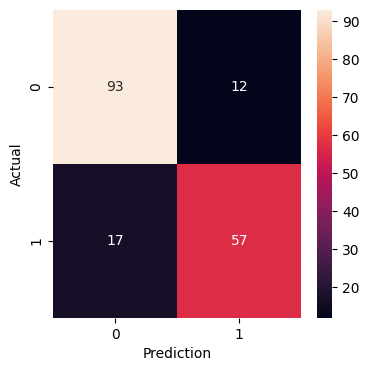

In [ ]:
# confusion matrix visualization
plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
# classification report
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



# Desicion Tree

In [ ]:
# Desicion Tree model
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[98  7]
 [18 56]]


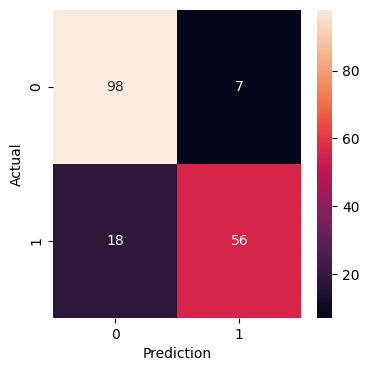

In [ ]:
# confusion matrix visualization
plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
# classification report
print(classification_report(y_test,y_pred_dt,zero_division=0))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       105
           1       0.89      0.76      0.82        74

    accuracy                           0.86       179
   macro avg       0.87      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179

